In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("/Users/lambardaar/Desktop/STUDY/python/CA/Bank_Churn.csv")
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Fixing BALANCE column


In [2]:
df["Balance"]=df["Balance"].replace(0,df["Balance"].mean())
df.head(10)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,76485.889288,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,76485.889288,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.780000,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,76485.889288,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.740000,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.070000,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.880000,1,1,1,71725.73,0


ENCODING

In [3]:
le_geo=LabelEncoder()
le_gen=LabelEncoder()
df['Geography']=le_geo.fit_transform(df["Geography"])
df['Gender']=le_gen.fit_transform(df["Gender"])


Feature Engineering

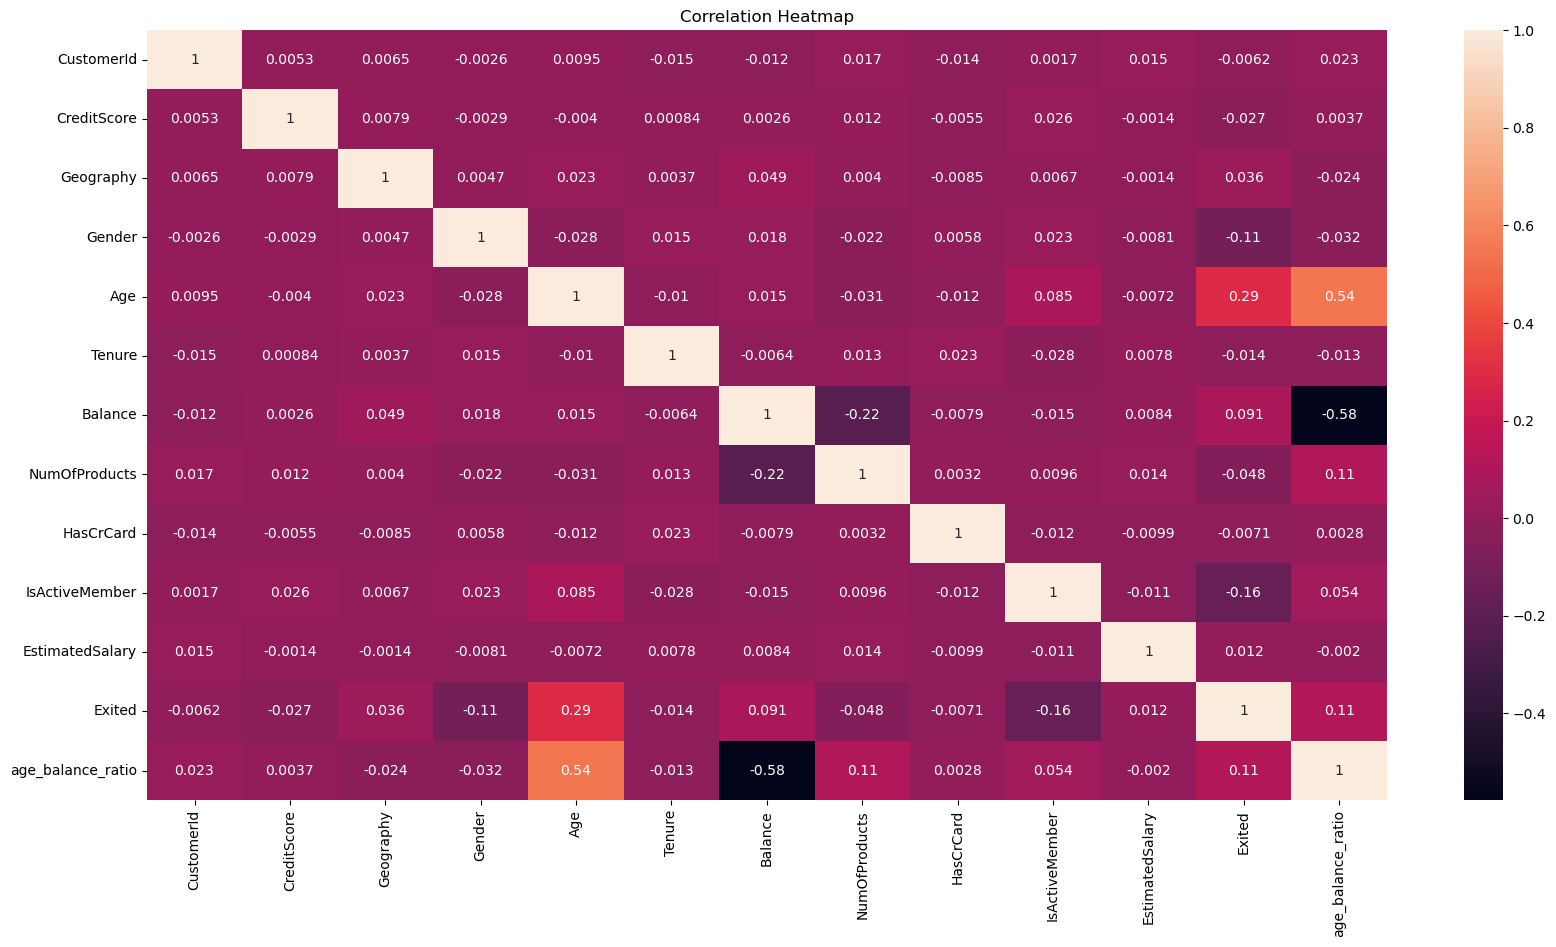

In [4]:
df['age_balance_ratio'] = df['Age'] / (df['Balance'] + 1)

plt.figure(figsize=(20,10),)
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

Feature selection

In [5]:
features = ["CreditScore", "Age", "Tenure", "NumOfProducts",
            "EstimatedSalary", "Gender", "Geography", "IsActiveMember", "age_balance_ratio"]
X = df[features]
y = df["Balance"]

FEATURE SCALING AND SPLITING DATA

In [6]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_sc, y, test_size=0.3, random_state=42
)

TRAINING  AND PREDECTION MODEL

In [7]:
gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05,max_depth=5, random_state=42)
gbr.fit(X_train, y_train)
pred = gbr.predict(X_test)


EVALUATION OF MODEL 

In [8]:
r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mse ** 0.5

print("R2 score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)


R2 score: 0.9985875416373396
MSE: 1401298.9472617267
RMSE: 1183.7647347601323


In [9]:
def bal(credit_score, age, tenure, num_products,
                   salary, gender, geography, is_active):
    
    gen_enc = le_gen.transform([gender])[0]
    geo_enc = le_geo.transform([geography])[0]

    avg_balance = df["Balance"].mean()
    age_balance_ratio = age / (avg_balance )

    user_df = pd.DataFrame([[
        credit_score, age, tenure, num_products,
        salary, gen_enc, geo_enc, is_active, age_balance_ratio
    ]], columns=features)

    user_scaled = scaler.transform(user_df)

    predicted_balance = gbr.predict(user_scaled)[0]

    print(f"predection of balance: ₹{predicted_balance:,.2f}")


In [10]:
bal(800, 42, 1, 1, 101348.88, "Male", "France", 1)


predection of balance: ₹105,941.72


In [11]:
# joblib.dump(gbr, "gbr.pkl")
# joblib.dump(scaler, "gbr_scaler.pkl")
# joblib.dump(le_gen, "le_gen.pkl")
# joblib.dump(le_geo, "le_geo.pkl")
# joblib.dump(df["Balance"].mean(), "avg_balance.pkl")


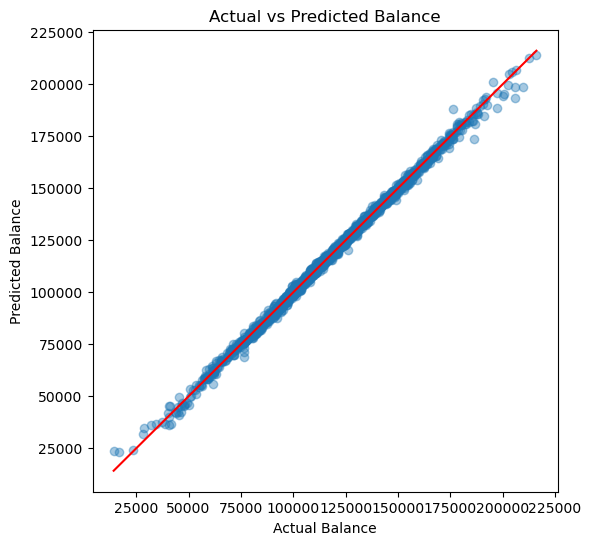

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred, alpha=0.4)
plt.xlabel("Actual Balance")
plt.ylabel("Predicted Balance")
plt.title("Actual vs Predicted Balance")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")  
plt.show()
